In [2]:
#数据清洗
import pandas as pd
import numpy as np

In [49]:
dataset = pd.read_csv("data/Data.csv")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [48]:
#查看缺失数据，并对其进行处理
#number_col
#插值函数
from scipy.interpolate import lagrange
def ployinterp_columns(s,n,k=5):
    #取前后k个数据
    labels = list(range(n-k,n))+list(range(n+1,n+1+k))
    y = s.loc[s.index.intersection(labels)]
    y = y[y.notnull()]#提出空值
    return lagrange(y.index,list(y))(n)

number_col = ["Age","Salary"]
for i in number_col:
    for j in range(len(dataset)):
        if (dataset[i].isnull())[j]:
            dataset[i][j] = ployinterp_columns(dataset[i],j)
            pass
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,68603.174603,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,36.464286,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


<AxesSubplot:ylabel='Age'>

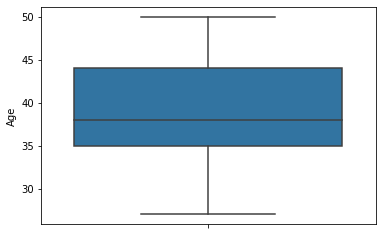

In [51]:
#箱型图判断
import seaborn as sns
sns.boxplot(
    data = dataset,
    y="Age"
)

